## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [2]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


## 2. Explore the dataset distribution
<hr>

Plot the training data points.

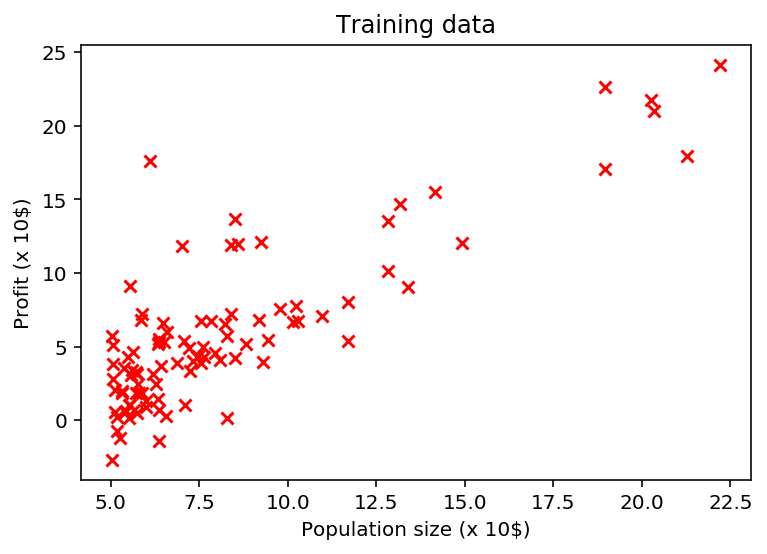

In [3]:
x_train = data[:,0]
y_train = data[:,1]

plt.title('Training data')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10$)')
plt.scatter(x_train, y_train, c = 'r', marker = 'x')

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [4]:
# construct data matrix
X = np.ones((len(x_train), 2))
for i in range(len(X)):
    X[i][1] = x_train[i]

# parameters vector
w = [1, 1]

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X,w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)


## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [6]:
# loss function definition
def loss_mse(y_pred,y): 

    loss = np.sum((y_pred - y) ** 2) / len(y)    
    return loss


# Test loss function 
y = y_train 
y_pred = f_pred(X,w)
loss = loss_mse(y_pred,y)

## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [11]:
# gradient function definition
def grad_loss(y_pred,y,X):
    
    grad = np.dot(X.T, y_pred - y) / len(X) * 2
    
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.0019621849060058594
10.973835031833165
[-0.5770974029560515, 0.8596358917014932]


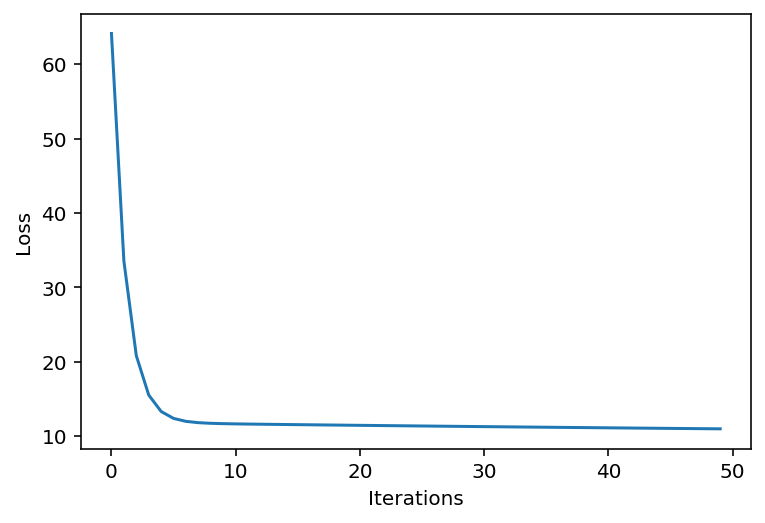

In [47]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = [] # record the loss values
    w_iters = [] # record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        tmp = []
        y_pred = f_pred(X,w) # linear predicition function
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss 
        
        for j in range(len(w)):
            w[j] = w[j] - tau * grad_f[j] # update rule of gradient descent
            tmp.append(w[j])
        
        w_iters.append(tmp) # save the current w value 
        L_iters.append(loss_mse(y_pred, y)) # save the current loss value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = [0, 0]
tau = 0.01
max_iter = 50

w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1] ) # plot the last value of the loss
print(w) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot([i for i in range(len(L_iters))], L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

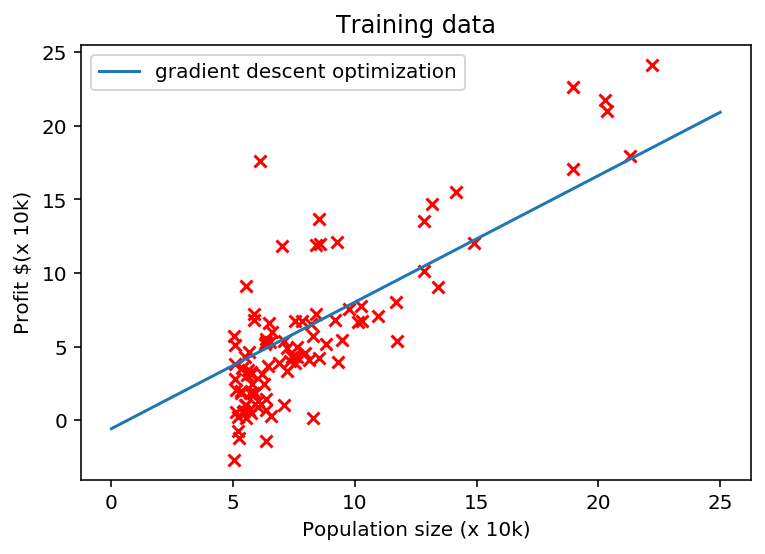

In [48]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
y_pred = x_pred * w[1] + w[0]
# plot
plt.figure(3)
plt.scatter(x_train, y_train, c='r', marker = 'x')
plt.plot(x_pred, y_pred, label ='gradient descent optimization' )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.0009980201721191406
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= 0.7020315537841397
loss gradient descent= 10.973835031833165


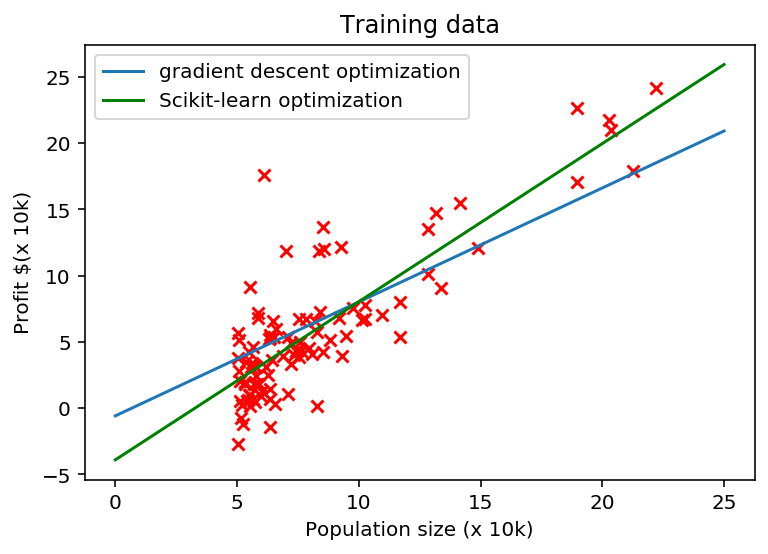

In [49]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
sklearn_x_train = x_train.reshape(len(x_train), 1)
sklearn_y_train = y_train.reshape(len(y_train), 1)

lin_reg_sklearn.fit(sklearn_x_train,sklearn_y_train) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)

loss_sklearn = lin_reg_sklearn.score(sklearn_x_train, sklearn_y_train) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
y_pred_sklearn = lin_reg_sklearn.predict(np.linspace(0,25,100).reshape(100, 1))

plt.figure(3)

plt.scatter(x_train, y_train, c='r', marker = 'x')
plt.plot(x_pred, y_pred, label ='gradient descent optimization' )
plt.plot(x_pred, y_pred_sklearn, c = 'g' ,label = 'Scikit-learn optimization' )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

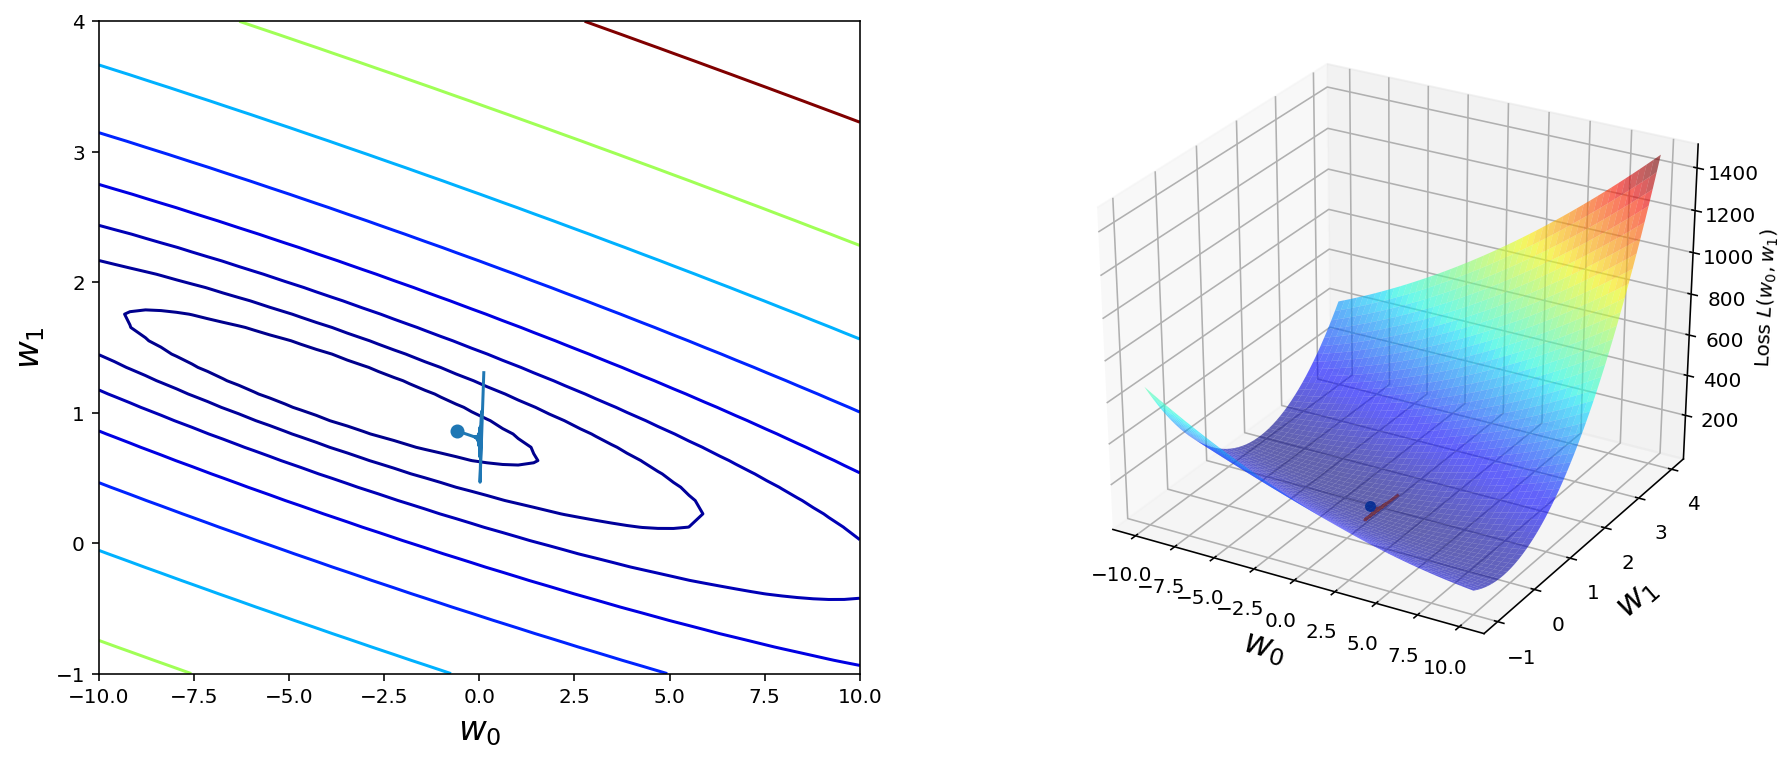

In [76]:
# Create grid coordinates for plotting a range of L(w0,w1)-values
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
    
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
for (i,j),v in np.ndenumerate(Z):
    contour_pred = x_train * B1[i] + B0[j]
    Z[i,j] = np.sum((contour_pred - y) ** 2) / len(y) 


    # 3D visualization
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(w[0], w[1])
ax1.plot(np.array(w_iters)[:,0],np.array(w_iters)[:,1]) # plot the loss curve

#     # Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Loss $L(w_0,w_1)$')
ax2.set_zlim(Z.min(),Z.max())    
ax2.plot(np.array(w_iters)[:,0],np.array(w_iters)[:,1])
ax2.scatter(w[0], w[1])

#     # settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$w_0$', fontsize=17)
    ax.set_ylabel(r'$w_1$', fontsize=17)

# Output results

## 1. Plot the training data (1pt)

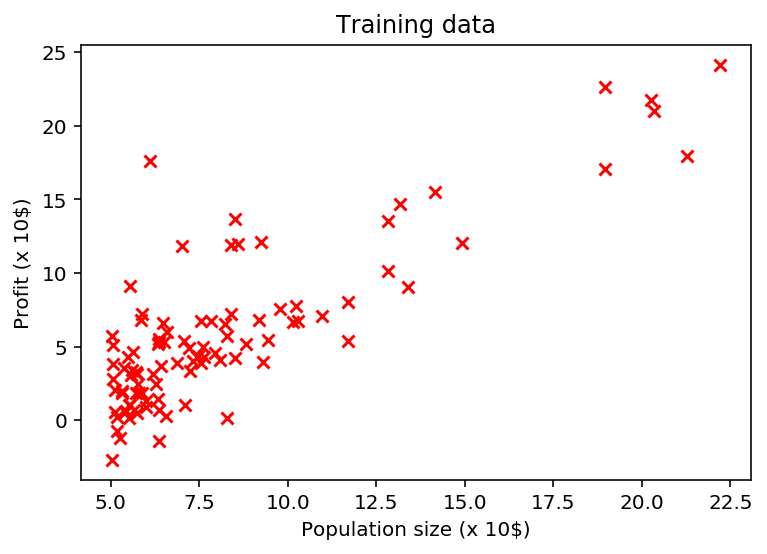

In [71]:
plt.title('Training data')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10$)')
plt.scatter(x_train, y_train, c = 'r', marker = 'x')

## 2. Plot the loss curve in the course of gradient descent (2pt)

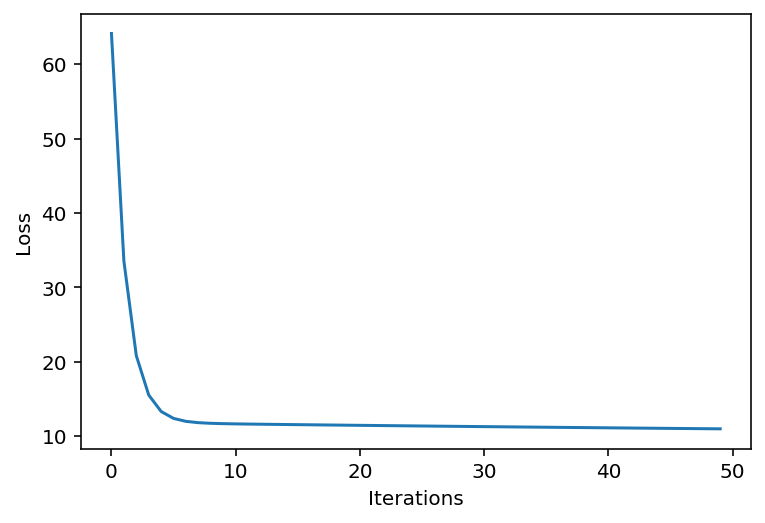

In [70]:
plt.figure(2)
plt.plot([i for i in range(len(L_iters))], L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 3. Plot the prediction function superimposed on the training data (2pt)

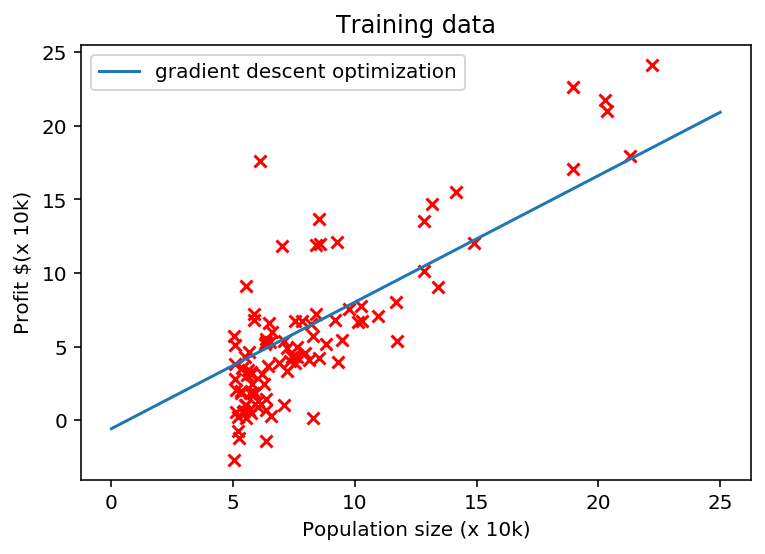

In [72]:
plt.scatter(x_train, y_train, c='r', marker = 'x')
plt.plot(x_pred, y_pred, label ='gradient descent optimization' )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

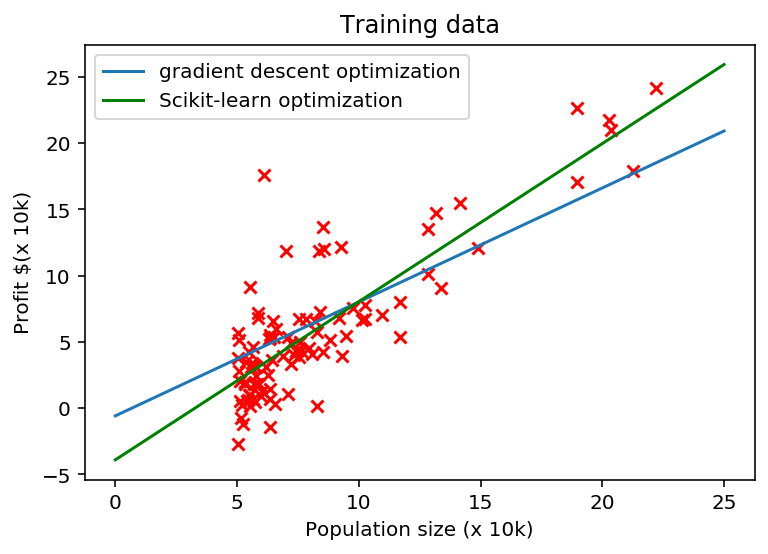

In [73]:
plt.scatter(x_train, y_train, c='r', marker = 'x')
plt.plot(x_pred, y_pred, label ='gradient descent optimization' )
plt.plot(x_pred, y_pred_sklearn, c = 'g' ,label = 'Scikit-learn optimization' )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

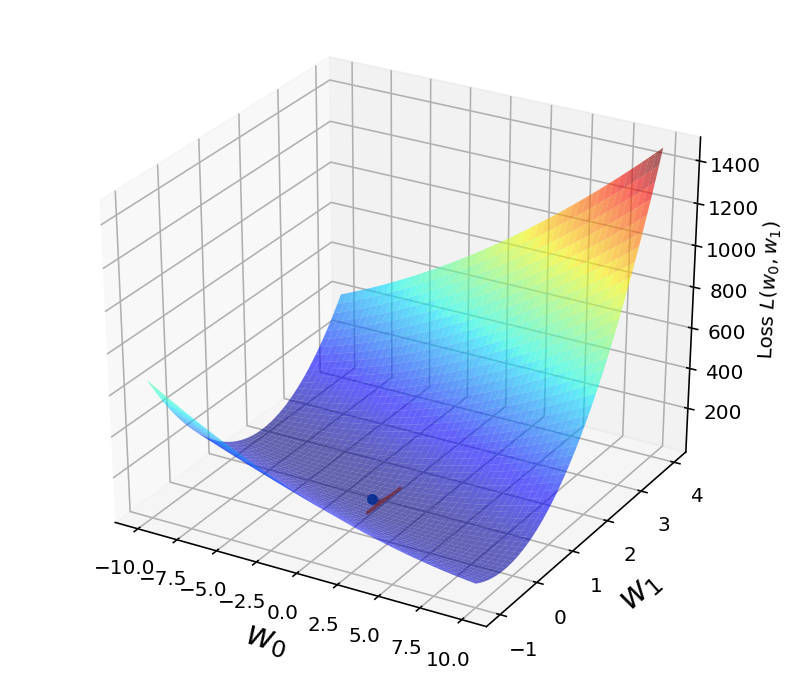

In [80]:
fig = plt.figure(figsize=(15,6))
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Loss $L(w_0,w_1)$')
ax2.set_zlim(Z.min(),Z.max())    
ax2.plot(np.array(w_iters)[:,0],np.array(w_iters)[:,1])
ax2.scatter(w[0], w[1])

for ax in fig.axes:
    ax.set_xlabel(r'$w_0$', fontsize=17)
    ax.set_ylabel(r'$w_1$', fontsize=17)

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

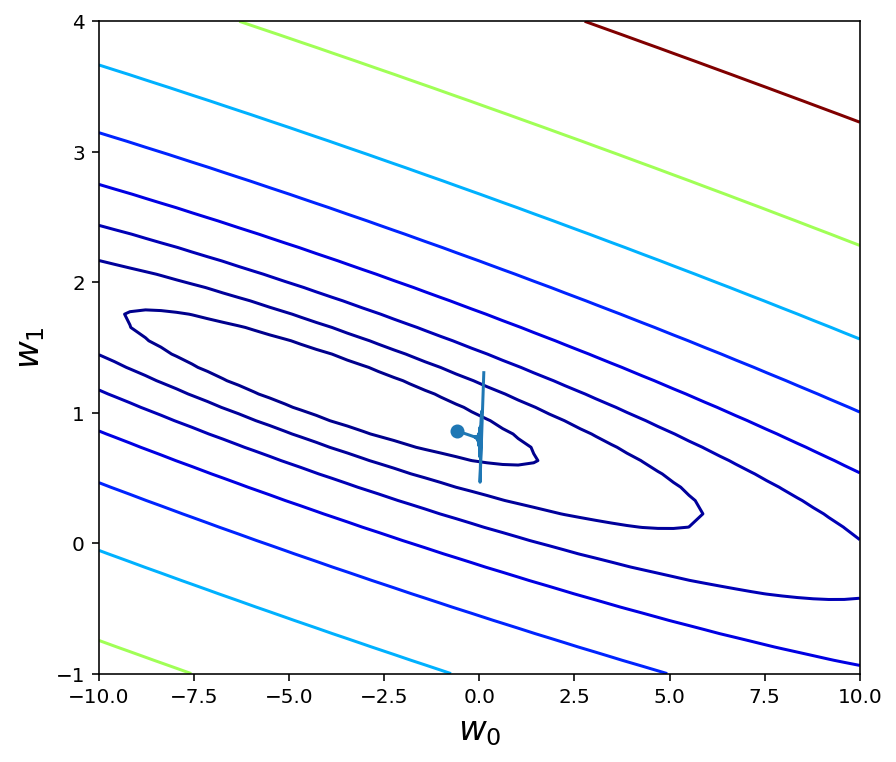

In [81]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)

CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(w[0], w[1])
ax1.plot(np.array(w_iters)[:,0],np.array(w_iters)[:,1]) # plot the loss curve

for ax in fig.axes:
    ax.set_xlabel(r'$w_0$', fontsize=17)
    ax.set_ylabel(r'$w_1$', fontsize=17)